### Problem Statement

In [6]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.easy_test()

### Exact solution

In [7]:
from Dynamic_programming.classic_knapsack import Dynamic_Programming_QKP_solver

dp_solver = Dynamic_Programming_QKP_solver(W_capacity, weights, values)
items_in_solution = dp_solver.run()
dp_solver.show_results()

 - Solution has items:  [1, 2]
Profit: 225
Weight: 50 (satisfies constraint W=50)
Energy: -225.0


### Simulated annealing

In [8]:
from Annealing_ham.QKP_ham import QKP_Hamiltonian

H_solver = QKP_Hamiltonian(W_capacity, weights, values)
H_solver.run_simulated_annealing_neal()
H_solver.show_results()

H_solver.energy_of_items(items_in_solution)


offset:  -140.631
 - Solution has items:  [0, 1, 2]
Profit: 317
Weight: 60 (does NOT satisfy constraint W=50)
Energy: -303.687
 - Evaluating candidate  [1, 2]
Profit: 225
Weight: 50 (satisfies constraint W=50)
Energy: -225.0


[Qibo 0.2.7|WARNING|2024-05-04 14:37:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


[Qibo 0.2.7|WARNING|2024-05-04 14:37:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Target energy -303.687
Target energy with offset -444.318
final annealing energy:  -296.58553960325935
final state:  [-0.01108349-0.00055637j  0.02728395+0.02006775j  0.0198046 -0.0334422j
  0.07743774+0.13191388j  0.01282692+0.01531875j  0.00997007+0.08855385j
 -0.14937713-0.10618441j -0.9194947 -0.29397569j]
most probable candidate:  0b111


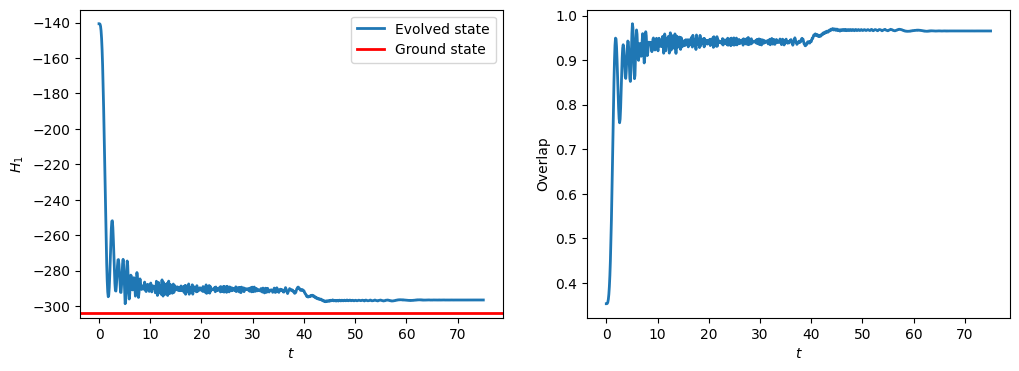

In [9]:
T = 75 # Total time of the adiabatic evolution.

# H_solver.build_Hamiltonian()
H_solver.build_qibo_Hamiltonian()
H_solver.run_simulated_annealing_qibo(T)
H_solver.show_qibo_results()

### DMRG

In [10]:
from DMRG.script import QKP_DMRG

h_coeffs, J_coeffs, offset = H_solver.get_ham_coeffs()
chi = 32
numsweeps = 15
qkp_DMRG = QKP_DMRG(N, chi, numsweeps, h_coeffs, J_coeffs, offset)

s = 1 # time of annealing we want to simulate
qkp_DMRG.build_MPO_time_s(s)
qkp_DMRG.run()
qkp_DMRG.show_results()

qkp_DMRG.energy_of_items('111')


Sweep: 1 of 15, Loc: 1,Energy: -163.023168
Sweep: 1 of 15, Loc: 0,Energy: -163.056000
Sweep: 1 of 15, Loc: 0,Energy: -163.056000
Sweep: 1 of 15, Loc: 1,Energy: -163.056000
Sweep: 2 of 15, Loc: 1,Energy: -163.056000
Sweep: 2 of 15, Loc: 0,Energy: -163.056000
Sweep: 2 of 15, Loc: 0,Energy: -163.056000
Sweep: 2 of 15, Loc: 1,Energy: -163.056000
Sweep: 3 of 15, Loc: 1,Energy: -163.056000
Sweep: 3 of 15, Loc: 0,Energy: -163.056000
Sweep: 3 of 15, Loc: 0,Energy: -163.056000
Sweep: 3 of 15, Loc: 1,Energy: -163.056000
Sweep: 4 of 15, Loc: 1,Energy: -163.056000
Sweep: 4 of 15, Loc: 0,Energy: -163.056000
Sweep: 4 of 15, Loc: 0,Energy: -163.056000
Sweep: 4 of 15, Loc: 1,Energy: -163.056000
Sweep: 5 of 15, Loc: 1,Energy: -163.056000
Sweep: 5 of 15, Loc: 0,Energy: -163.056000
Sweep: 5 of 15, Loc: 0,Energy: -163.056000
Sweep: 5 of 15, Loc: 1,Energy: -163.056000
Sweep: 6 of 15, Loc: 1,Energy: -163.056000
Sweep: 6 of 15, Loc: 0,Energy: -163.056000
Sweep: 6 of 15, Loc: 0,Energy: -163.056000
Sweep: 6 of